<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/ImageDataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


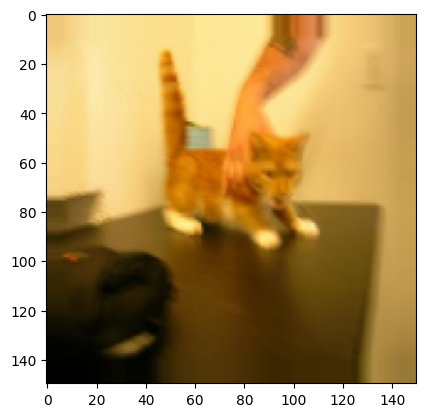

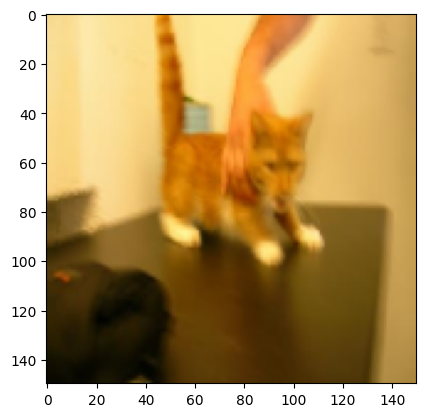

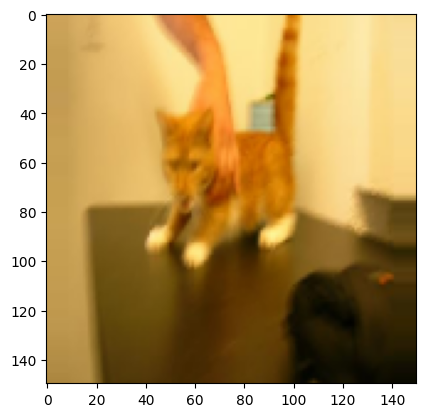

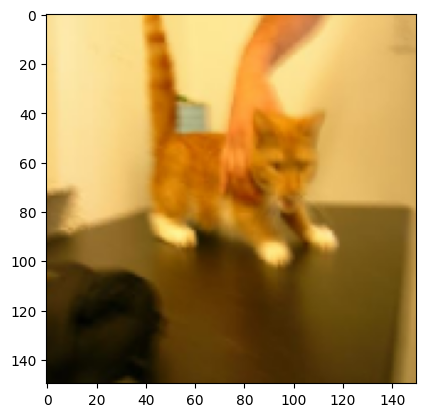

In [3]:


from google.colab import drive
drive.mount('/content/drive')



from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Directorio que contiene tus imágenes
directory_path = "/content/drive/MyDrive/druida/Cat"

# Configuración del generador de datos
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Generador de datos de entrenamiento
train_generator = datagen.flow_from_directory(
    directory_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Generador de datos de validación
validation_generator = datagen.flow_from_directory(
    directory_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Visualización de algunas imágenes aumentadas
img_path = os.path.join(directory_path, '0.jpg')
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# Genera lotes de imágenes aumentadas y las muestra
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()
